In [56]:
from glob import glob
from IPython.display import HTML
from tqdm import tqdm
from os import path
import numpy as np
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from pytube import YouTube

In [4]:
def show_cvimg(img):
    img2 = img[:,:,::-1] 
    plt.imshow(img2)
    plt.show()

In [5]:
def show_grayscale_img(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

# Get Video

In [6]:
video_file = YouTube('https://youtu.be/n9xhJrPXop4').streams.first().download()

In [47]:
html_code ="""
<div align="middle">
<video width="80%" controls>
      <source src="{0}" type="video/mp4">
</video></div>
    """.format(path.basename(video_file))
    
print(html_code)

HTML(html_code)


<div align="middle">
<video width="80%" controls>
      <source src="Dune Official Trailer.mp4" type="video/mp4">
</video></div>
    


# Make Frames

In [7]:
def make_frames(video_file):
    vidcap = cv2.VideoCapture(video_file)
    success,image = vidcap.read()
    count = 0
    while success:
      cv2.imwrite("frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
      success,image = vidcap.read()
      count += 1

In [8]:
make_frames(video_file)

# Read test image

In [9]:
test_img = cv2.imread('frames/frame1093.jpg')

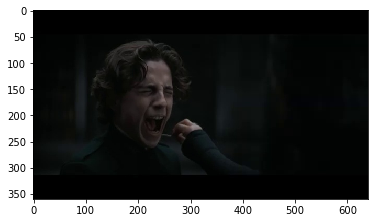

In [10]:
show_cvimg(test_img)

# Normalize frame

In [11]:
def normalize_img(img):
    return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

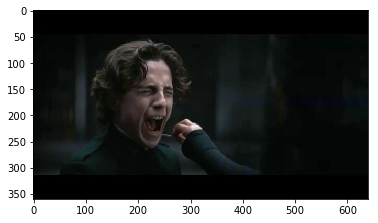

In [12]:
normalized_test_img = normalize_img(test_img)
show_cvimg(normalized_test_img)

# Load the cascade classifier

In [13]:
face_cascade_front = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade_profile = cv2.CascadeClassifier('haarcascade_profileface.xml')

# Convert the normalized image to grayscale

In [14]:
# Convert into grayscale
gray = cv2.cvtColor(normalized_test_img, cv2.COLOR_BGR2GRAY)

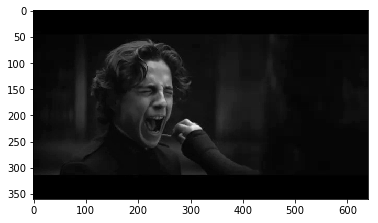

In [15]:
show_grayscale_img(gray)

# Detect faces

In [16]:
# Detect front faces
front_faces = face_cascade_front.detectMultiScale(gray, 1.05, 6)
front_faces

array([[192, 118,  98,  98]], dtype=int32)

In [17]:
# Detect profile faces
profile_faces = face_cascade_profile.detectMultiScale(gray, 1.05, 6)
profile_faces

()

In [19]:
 bb_img = np.copy(test_img)

In [20]:
# Draw green rectangles around front faces
for (x, y, w, h) in front_faces:
    cv2.rectangle(bb_img, (x, y), (x+w, y+h), (0, 255, 0), 5)

In [21]:
# Draw red rectangle around profile faces
for (x, y, w, h) in profile_faces:
    cv2.rectangle( bb_img, (x, y), (x+w, y+h), (0, 0, 255), 5)

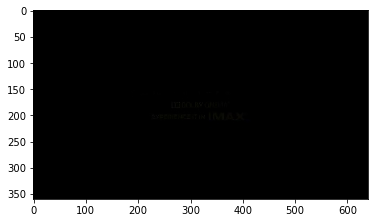

In [70]:
show_cvimg(bb_img)

In [71]:
def add_face_bounding_boxes(img, face_cascade_front, face_cascade_profile):
    normalized_img = normalize_img(img)
    gray = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2GRAY)
    front_faces = face_cascade_front.detectMultiScale(gray, 1.05, 6)
    #profile_faces = face_cascade_profile.detectMultiScale(gray, 1.05, 6)
    
    # don't modify original image
    bb_img = np.copy(img)
    
    for (x, y, w, h) in front_faces:
        cv2.rectangle(bb_img, (x, y), (x+w, y+h), (0, 255, 0), 5)
        
    """
    for (x, y, w, h) in profile_faces:
        cv2.rectangle(bb_img, (x, y), (x+w, y+h), (0, 0, 255), 5)
    """
    
    return bb_img

In [72]:
i = 0
curr_file = "frames/frame{0}.jpg".format(i)
while path.exists(curr_file):
    img = cv2.imread(curr_file)
    bb_img = add_face_bounding_boxes(img, face_cascade_front, face_cascade_profile)
    cv2.imwrite('bb_frames/frame{0}.jpg'.format(i), bb_img)
    i += 1
    curr_file = "frames/frame{0}.jpg".format(i)

In [73]:
frameSize = (img.shape[1], img.shape[0])
frameSize

(640, 360)

In [86]:
out = cv2.VideoWriter('output.mp4',-1, 21, frameSize)

i = 0
curr_file = "bb_frames/frame{0}.jpg".format(i)
while path.exists(curr_file):
    img = cv2.imread(curr_file)
    out.write(img)
    i += 1
    curr_file = "bb_frames/frame{0}.jpg".format(i)
    
out.release()

In [88]:
html_code ="""
<div align="middle">
<video width="80%" controls>
      <source src="{0}" type="video/mp4">
</video></div>
    """.format('output.mp4')
    
print(html_code)

HTML(html_code)


<div align="middle">
<video width="80%" controls>
      <source src="output.mp4" type="video/mp4">
</video></div>
    
